# Kshitij Naresh Raut
## Let's Grow More
## Task-2 : Stock Market Prediction And Forecasting Using Stacked LSTM
## Datasetlink : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv 

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import tensorflow as tf
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error
%matplotlib inline


Load the data

In [3]:
df=pd.read_csv('NSE-TATAGLOBAL.csv')

In [4]:
df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


statistical Analysis of the data

In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
df.shape

(2035, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [10]:
df.reset_index(inplace=True)

In [11]:
df_close= df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [12]:
df1= df.reset_index()['Close']

## Data Visualization

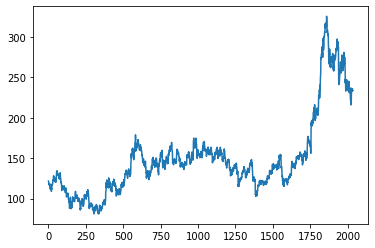

In [13]:
plt.plot(df['Close'])

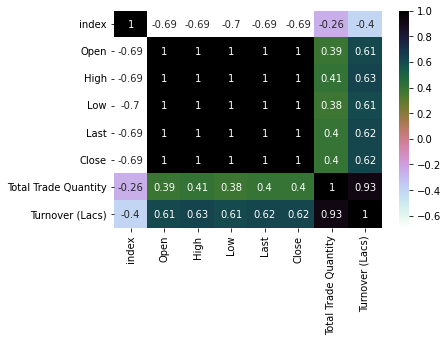

In [14]:
sns.heatmap(df.corr(), annot=True, cmap="cubehelix_r")

Scaling data

In [15]:
scalar=MinMaxScaler(feature_range=(0,1))
df_close= scalar.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

Splitting the data into train and test

In [16]:
training_size= int(len(df_close)*0.70)
test_size = len(df_close)- training_size
train , test = df_close[0: training_size,:],df_close[training_size : len(df_close),:1]

                   

In [28]:
def create_mat(dataset,time_step=1):
  dataX,dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)


In [29]:
time_step = 100
x_train , y_train = create_mat(train, time_step)
x_test, y_test = create_mat(test , time_step)

In [31]:
x_train.shape

(1323, 100)

In [32]:
y_train.shape

(1323,)

In [33]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)


LSTM model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model = Sequential()
model.add(LSTM(50,return_sequences = True , input_shape=(100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Train the model

In [38]:
model.fit(x_train, y_train, validation_split =0.1, epochs=40, batch_size=64,verbose=1)

Epoch 1/40
19/19 [==============================] - 11s 239ms/step - loss: 0.0129 - val_loss: 0.0014
Epoch 2/40
19/19 [==============================] - 3s 173ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 3/40
19/19 [==============================] - 3s 174ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/40
19/19 [==============================] - 3s 172ms/step - loss: 8.9434e-04 - val_loss: 0.0012
Epoch 5/40
19/19 [==============================] - 3s 172ms/step - loss: 8.7406e-04 - val_loss: 0.0013
Epoch 6/40
19/19 [==============================] - 3s 171ms/step - loss: 8.6759e-04 - val_loss: 0.0011
Epoch 7/40
19/19 [==============================] - 3s 173ms/step - loss: 8.0192e-04 - val_loss: 0.0011
Epoch 8/40
19/19 [==============================] - 3s 171ms/step - loss: 7.7947e-04 - val_loss: 0.0011
Epoch 9/40
19/19 [==============================] - 4s 207ms/step - loss: 7.4866e-04 - val_loss: 9.5418e-04
Epoch 10/40
19/19 [==============================] - 3s 173ms/step - lo

Prediction

In [41]:
predictions = model.predict(x_test)

In [43]:
inv_predictions = scalar.inverse_transform(predictions)

In [44]:
inv_predictions

array([[140.36067 ],
       [140.69087 ],
       [140.74315 ],
       [140.11594 ],
       [139.16985 ],
       [138.1428  ],
       [137.49246 ],
       [137.30093 ],
       [137.31311 ],
       [137.41309 ],
       [137.61101 ],
       [138.17813 ],
       [138.86198 ],
       [139.85612 ],
       [141.217   ],
       [141.808   ],
       [141.73915 ],
       [141.46783 ],
       [141.14351 ],
       [141.93112 ],
       [143.49823 ],
       [145.42297 ],
       [147.31833 ],
       [148.50398 ],
       [149.39928 ],
       [149.78455 ],
       [149.8795  ],
       [150.07478 ],
       [150.18927 ],
       [150.21184 ],
       [150.31958 ],
       [150.11407 ],
       [149.17012 ],
       [146.97418 ],
       [144.27423 ],
       [141.66727 ],
       [139.51295 ],
       [137.68448 ],
       [135.94656 ],
       [134.01479 ],
       [132.19212 ],
       [130.66017 ],
       [129.07036 ],
       [127.80149 ],
       [126.413925],
       [124.82996 ],
       [123.55504 ],
       [122.5

In [48]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# transform to origina form
train_predict= scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

Calculate RootMeanSquare Error of the model


In [50]:
MSE= math.sqrt(mean_squared_error(y_test, predictions))
print('The MSE for above model is:',MSE)

The MSE for above model is: 0.0772800950673391


Plotting

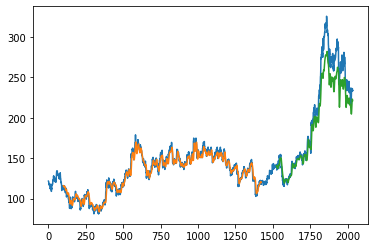

In [54]:
look_back=100
trainPredictPlot= np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scalar.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [55]:
temp_input = list(x_test)
temp_input = temp_input[0].tolist()
temp_input

[[0.16217320261437906],
 [0.15951797385620914],
 [0.16707516339869277],
 [0.15992647058823523],
 [0.1605392156862745],
 [0.16441993464052285],
 [0.1668709150326797],
 [0.16932189542483655],
 [0.16074346405228757],
 [0.1597222222222222],
 [0.1640114379084967],
 [0.15727124183006536],
 [0.14705882352941174],
 [0.14460784313725483],
 [0.15175653594771238],
 [0.15441176470588236],
 [0.15216503267973858],
 [0.14848856209150324],
 [0.15522875816993464],
 [0.1576797385620915],
 [0.16217320261437906],
 [0.16094771241830064],
 [0.1633986928104575],
 [0.15931372549019607],
 [0.1597222222222222],
 [0.1611519607843137],
 [0.16666666666666663],
 [0.15747549019607843],
 [0.1537990196078431],
 [0.14848856209150324],
 [0.15114379084967322],
 [0.15032679738562088],
 [0.1515522875816993],
 [0.15645424836601307],
 [0.16033496732026142],
 [0.1566584967320261],
 [0.15686274509803916],
 [0.1774918300653595],
 [0.1797385620915033],
 [0.17442810457516345],
 [0.19281045751633985],
 [0.1860702614379085],
 [0.18